# Pre-Processing (for Clustering)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 100
import seaborn as sns; sns.set()

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
!ls "drive/My Drive/malin"

dataset_class_1.csv  dataset_clust_2.csv   training_KNN.xlsx
dataset_class_2.csv  retail_record_4.xlsx  used_cars.csv
dataset_clust_1.csv  testing_KNN.xlsx


In [173]:
data = pd.read_csv("drive/My Drive/malin/used_cars.csv")
data
data.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


**Drop Unnecessary Feature**

Terdapat fitur yang memiliki count = 0 yang dapat berdampak besar saat proses missing value handling

In [174]:
data = data.drop(['county'], axis=1)
data.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,59.746600,9.095700


**Missing Value**

In [175]:
#drop missing value
data_miss = DataFrame.dropna(data)
data_miss

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,ut,40.7372,-111.858
24,24,7034278551,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,4600,2008.0,honda,civic,good,4 cylinders,gas,110982.0,clean,automatic,2HGFA16528H503005,fwd,mid-size,sedan,grey,https://images.craigslist.org/00F0F_iyJxhCTmYP...,Selling this 2008 Honda Civic 1.8L four door L...,ut,40.7499,-111.926
48,48,7033720842,https://saltlakecity.craigslist.org/ctd/d/orem...,salt lake city,https://saltlakecity.craigslist.org,28000,2004.0,ford,f550 mechanics service,good,10 cylinders,gas,67348.0,clean,automatic,1FDAX57S84EA78390,4wd,full-size,truck,white,https://images.craigslist.org/01414_iVqrz2Dm9q...,Mechanics Service Truck 2004 Ford F550 4x4 Ext...,ut,40.3179,-111.704
112,112,7033077397,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,4000,2011.0,nissan,altima 2.5 s,excellent,4 cylinders,gas,110000.0,clean,automatic,1N4AL2AP8BN463891,fwd,full-size,sedan,blue,https://images.craigslist.org/01515_iWDLXkkYUO...,"Car is in Good running/driving condition, just...",ut,40.6557,-111.886
135,135,7032693370,https://saltlakecity.craigslist.org/ctd/d/sadd...,salt lake city,https://saltlakecity.craigslist.org,38995,2016.0,ford,f-150,good,8 cylinders,gas,38086.0,clean,automatic,1FTEW1EF4GFC63056,4wd,full-size,truck,white,https://images.craigslist.org/00D0D_jo28Iq5OKp...,"2016 Ford F-150 4WD SuperCrew 145"" King Ranch ...",ut,44.3550,-106.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19907,19907,7049230489,https://kpr.craigslist.org/cto/d/kennewick-200...,kennewick-pasco-richland,https://kpr.craigslist.org,11500,2006.0,chevrolet,cobalt ss,like new,4 cylinders,gas,45568.0,clean,manual,1G1AP14P967758554,fwd,compact,coupe,yellow,https://images.craigslist.org/01010_9hTYSnZBC2...,Car is in almost new condition. 45568 original...,wa,46.2348,-119.159
19919,19919,7049199145,https://kpr.craigslist.org/ctd/d/portland-2014...,kennewick-pasco-richland,https://kpr.craigslist.org,10995,2014.0,toyota,corolla,excellent,4 cylinders,gas,70822.0,clean,automatic,5YFBURHE9EP076606,fwd,compact,sedan,white,https://images.craigslist.org/00N0N_k8w2HJ0pp5...,2014 *** Toyota Corolla LE Premium *37 MPG!* C...,wa,45.4881,-122.580
19927,19927,7049187416,https://kpr.craigslist.org/ctd/d/kennewick-17-...,kennewick-pasco-richland,https://kpr.craigslist.org,11995,2017.0,subaru,impreza 2.0i sport,like new,4 cylinders,gas,35050.0,rebuilt,automatic,4S3GTAK61H3713951,4wd,mid-size,wagon,blue,https://images.craigslist.org/00404_aodx8kYnQl...,-HABLAMOS ESPAÃOL -17 Subaru Impreza 2.0I Spo...,wa,46.2379,-119.237
19944,19944,7049187695,https://kpr.craigslist.org/cto/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,18995,2019.0,jeep,cherokee latitude fwd,excellent,4 cylinders,gas,4100.0,clean,automatic,1C4PJLCB6KD381973,fwd,full-size,SUV,green,https://images.craigslist.org/01616_1h7FTMNh8c...,Excellent condition. Not a ding or scratch on ...,wa,46.2676,-119.215


**Selected Feature Candidate**

Memilih kandidat fitur-fitur yang akan digunakan

In [176]:
sel_data_c = data_miss[['id','region','price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','state','lat','long']]
sel_data_c

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,lat,long
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,ut,40.7372,-111.858
24,7034278551,salt lake city,4600,2008.0,honda,civic,good,4 cylinders,gas,110982.0,clean,automatic,fwd,mid-size,sedan,ut,40.7499,-111.926
48,7033720842,salt lake city,28000,2004.0,ford,f550 mechanics service,good,10 cylinders,gas,67348.0,clean,automatic,4wd,full-size,truck,ut,40.3179,-111.704
112,7033077397,salt lake city,4000,2011.0,nissan,altima 2.5 s,excellent,4 cylinders,gas,110000.0,clean,automatic,fwd,full-size,sedan,ut,40.6557,-111.886
135,7032693370,salt lake city,38995,2016.0,ford,f-150,good,8 cylinders,gas,38086.0,clean,automatic,4wd,full-size,truck,ut,44.3550,-106.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19907,7049230489,kennewick-pasco-richland,11500,2006.0,chevrolet,cobalt ss,like new,4 cylinders,gas,45568.0,clean,manual,fwd,compact,coupe,wa,46.2348,-119.159
19919,7049199145,kennewick-pasco-richland,10995,2014.0,toyota,corolla,excellent,4 cylinders,gas,70822.0,clean,automatic,fwd,compact,sedan,wa,45.4881,-122.580
19927,7049187416,kennewick-pasco-richland,11995,2017.0,subaru,impreza 2.0i sport,like new,4 cylinders,gas,35050.0,rebuilt,automatic,4wd,mid-size,wagon,wa,46.2379,-119.237
19944,7049187695,kennewick-pasco-richland,18995,2019.0,jeep,cherokee latitude fwd,excellent,4 cylinders,gas,4100.0,clean,automatic,fwd,full-size,SUV,wa,46.2676,-119.215


**Data Encode**

Encode data yang bertipe non-numeric

In [177]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sel_data_c['region'] = labelencoder.fit_transform(sel_data_c['region']) 
sel_data_c['manufacturer'] = labelencoder.fit_transform(sel_data_c['manufacturer']) 
sel_data_c['model'] = labelencoder.fit_transform(sel_data_c['model']) 
sel_data_c['condition'] = labelencoder.fit_transform(sel_data_c['condition']) 
sel_data_c['cylinders'] = labelencoder.fit_transform(sel_data_c['cylinders']) 
sel_data_c['fuel'] = labelencoder.fit_transform(sel_data_c['fuel']) 
sel_data_c['title_status'] = labelencoder.fit_transform(sel_data_c['title_status']) 
sel_data_c['transmission'] = labelencoder.fit_transform(sel_data_c['transmission']) 
sel_data_c['drive'] = labelencoder.fit_transform(sel_data_c['drive']) 
sel_data_c['size'] = labelencoder.fit_transform(sel_data_c['size']) 
sel_data_c['type'] = labelencoder.fit_transform(sel_data_c['type']) 
sel_data_c['state'] = labelencoder.fit_transform(sel_data_c['state']) 

sel_data_c

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,lat,long
0,7034441763,11,17899,2012.0,33,511,0,3,2,63500.0,0,1,0,0,4,0,40.7372,-111.858
24,7034278551,11,4600,2008.0,12,221,2,3,2,110982.0,0,0,1,2,9,0,40.7499,-111.926
48,7033720842,11,28000,2004.0,10,448,2,0,2,67348.0,0,0,0,1,10,0,40.3179,-111.704
112,7033077397,11,4000,2011.0,25,116,0,3,2,110000.0,0,0,1,1,9,0,40.6557,-111.886
135,7032693370,11,38995,2016.0,10,408,2,6,2,38086.0,0,0,0,1,10,0,44.3550,-106.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19907,7049230489,5,11500,2006.0,6,239,3,3,2,45568.0,0,1,1,0,3,3,46.2348,-119.159
19919,7049199145,5,10995,2014.0,32,258,0,3,2,70822.0,0,0,1,0,9,3,45.4881,-122.580
19927,7049187416,5,11995,2017.0,30,547,3,3,2,35050.0,3,0,0,2,12,3,46.2379,-119.237
19944,7049187695,5,18995,2019.0,16,216,0,3,2,4100.0,0,0,1,1,0,3,46.2676,-119.215


**Heat Map**


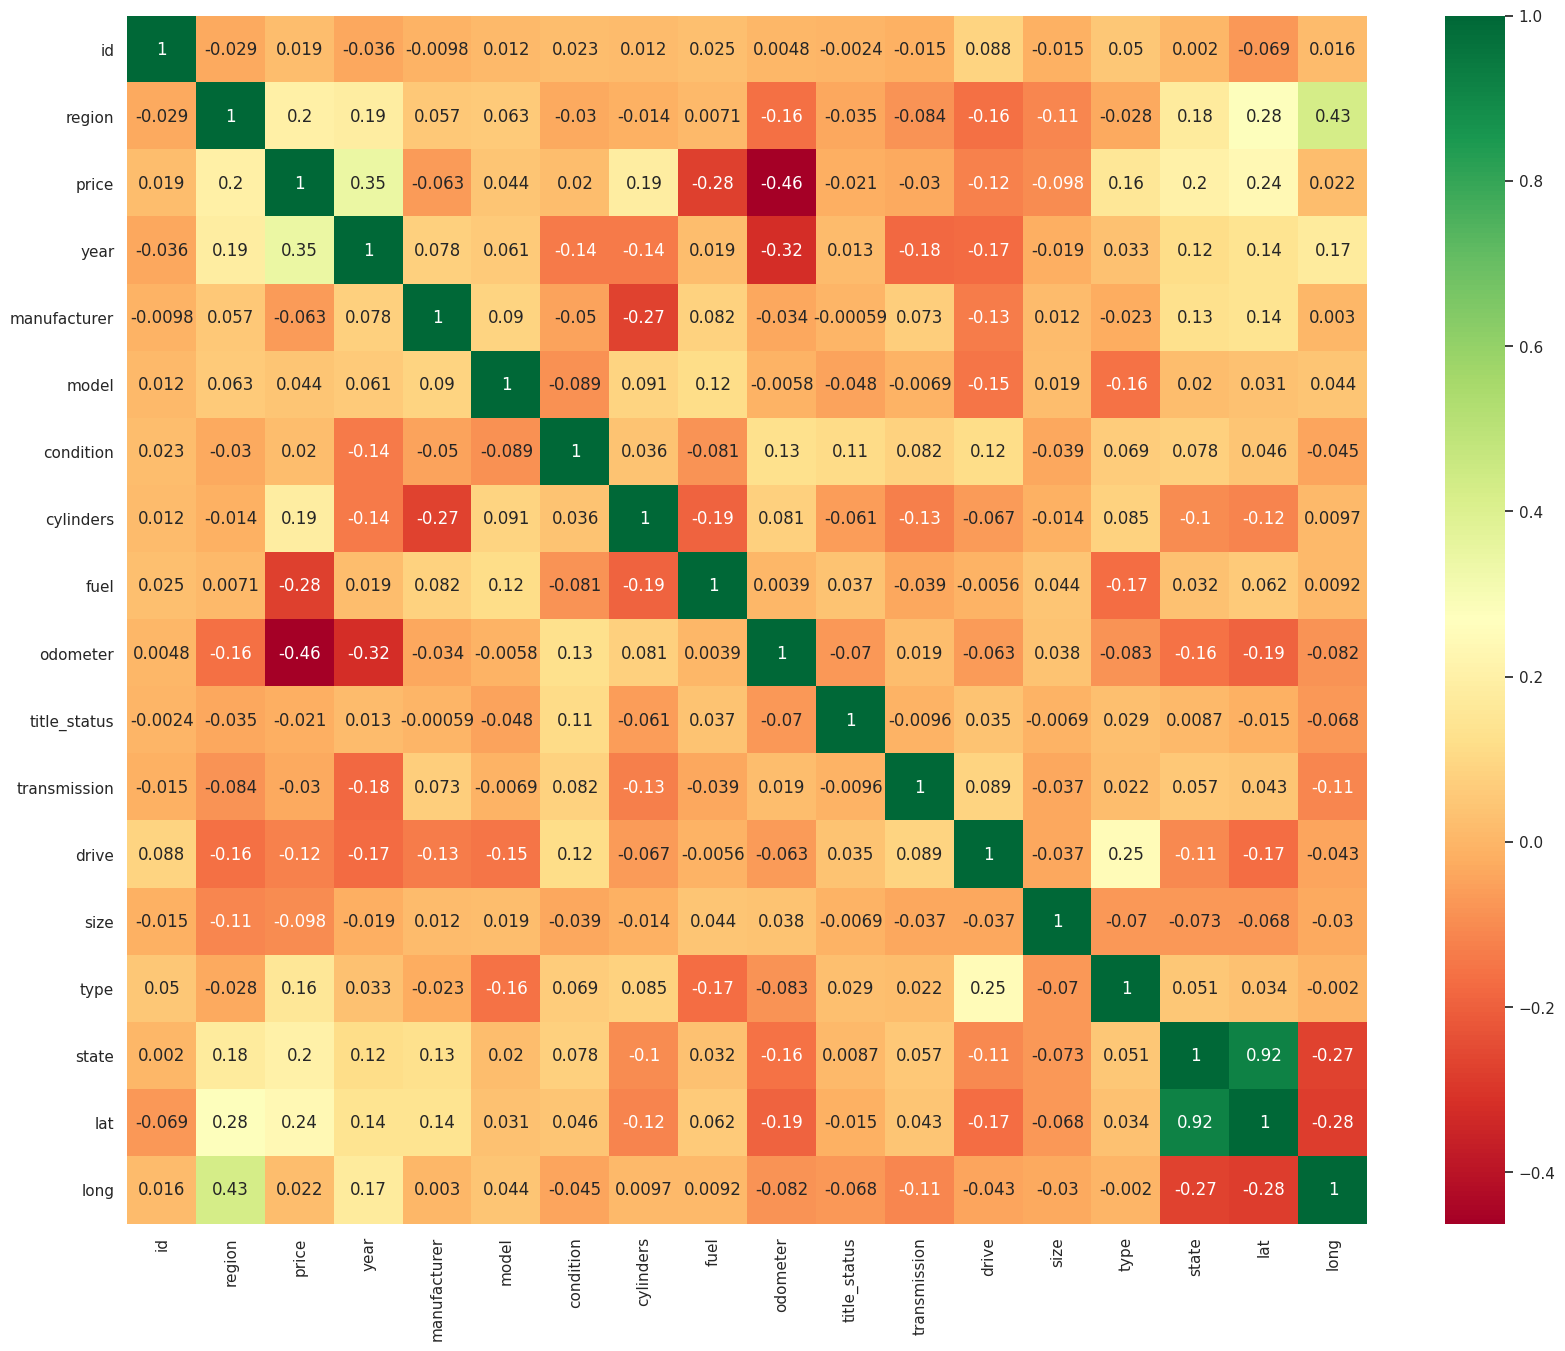

In [178]:
#untuk menentukan fitur-fitur yang berkorelasi cukup baik
corel = sel_data_c.corr()
top_corr = corel.index
plt.figure(figsize=(20,16))
sns.heatmap(sel_data_c[top_corr].corr(),annot=True,cmap="RdYlGn")
plt.show()

Fitur yang dipilih adalah state dan lat dengan nilai 0.92

**Selected Feature**

In [179]:
sel_feat = sel_data_c[['state','lat']]
sel_feat

,state,lat
0,0,40.7372
24,0,40.7499
48,0,40.3179
112,0,40.6557
135,0,44.3550
...,...,...
19907,3,46.2348
19919,3,45.4881
19927,3,46.2379
19944,3,46.2676


**Outlier Check**

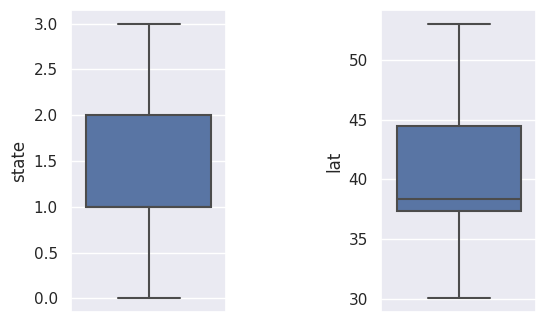

In [180]:
# plt.scatter(sel_feat['condition'], sel_feat['odometer'],c='green')
# plt.xlabel('condition')
# plt.ylabel('odometer')
# plt.show
f, axes = plt.subplots(1, 2)
sns.boxplot(y = sel_data_c['state'], ax = axes[0])
sns.boxplot(y = sel_data_c['lat'], ax = axes[1])
plt.subplots_adjust(wspace=1)

**Outlier Handling**

tidak terdapat outlier pada kedua feature

In [181]:
sdc_out = sel_feat
sdc_out

,state,lat
0,0,40.7372
24,0,40.7499
48,0,40.3179
112,0,40.6557
135,0,44.3550
...,...,...
19907,3,46.2348
19919,3,45.4881
19927,3,46.2379
19944,3,46.2676


In [182]:
sdc_out.describe()

,state,lat
count,2814.000000,2814.000000
mean,1.386283,40.288347
std,0.617067,3.664149
min,0.000000,30.041600
25%,1.000000,37.336800
50%,1.000000,38.382950
75%,2.000000,44.439500
max,3.000000,53.032400


**Scalling**

Karena terdapat gap yang cukup jauh antara nilai-nilai pada kedua fitur, maka akan dilakukan scalling

In [183]:
scaler = MinMaxScaler()
data_data = sdc_out.values.tolist()
scaler.fit(data_data)
sdc_scaled = scaler.transform(data_data)
new_col = ['state','lat']
sdc_new = pd.DataFrame(sdc_scaled,columns=new_col)
sdc_new.to_csv('drive/My Drive/malin/dataset_clust_2.csv')
sdc_new.describe()

,state,lat
count,2814.000000,2814.000000
mean,0.462094,0.445689
std,0.205689,0.159375
min,0.000000,0.000000
25%,0.333333,0.317310
50%,0.333333,0.362813
75%,0.666667,0.626246
max,1.000000,1.000000


# Clustering

**Find Ideal K value**

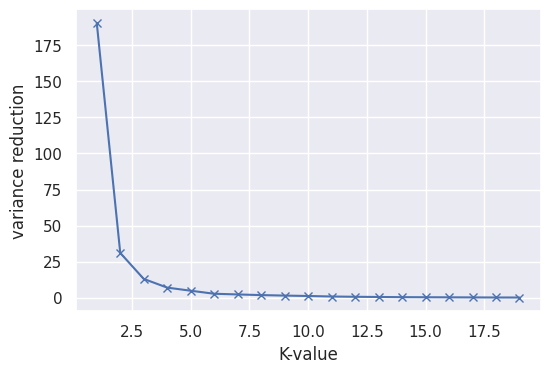

In [184]:
from sklearn.cluster import KMeans

r = range(1,20)
square_dist = []
for i in r:
  km = KMeans(n_clusters=i)
  km = km.fit(sdc_new)
  square_dist.append(km.inertia_)

plt.plot(r,square_dist,'bx-')
plt.xlabel('K-value')
plt.ylabel('variance reduction') 
plt.show()

berdasarkan hasil diatas, maka k = 2

**K-Means Clustering**

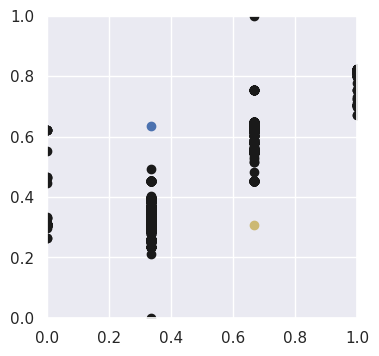

In [185]:
np.random.seed(200)
k = 2
centroids = {
  i+1: [np.random.choice(sdc_new['state']),np.random.choice(sdc_new['lat'])]
  for i in range(k)
}

# cen = make_centroid(sdc_new)
# k=3
fig = plt.figure(figsize=(4,4))
plt.scatter(sdc_new['state'], sdc_new['lat'], color='k')
colmap = {1:'b', 2:'y'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


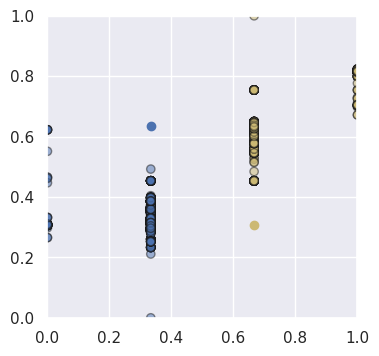

In [186]:
##assignment stage

def assignment(df, centroids):
  for i in centroids.keys():
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['state']-centroids[i][0])**2 + (df['lat']-centroids[i][0])**2
        )
    )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df
df = assignment(sdc_new, centroids)

fig = plt.figure(figsize=(4,4))
plt.scatter(df['state'], df['lat'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

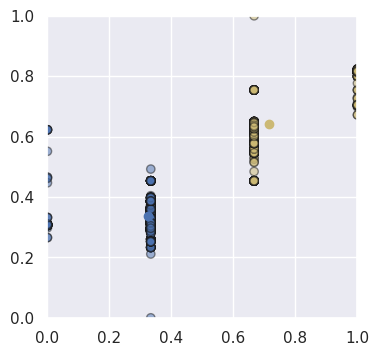

In [187]:
## update stage
import copy
old_centroids = copy.deepcopy(centroids)

def update_cen(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest']==i]['state'])
    centroids[i][1] = np.mean(df[df['closest']==i]['lat'])
  return k

centroids = update_cen(centroids)

fig = plt.figure(figsize=(4,4))
ax = plt.axes()
plt.scatter(df['state'], df['lat'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


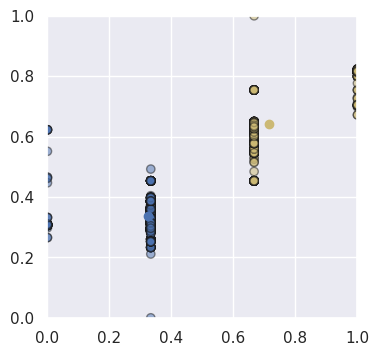

In [188]:
## loop until centroid not change

# df = assignment(df, centroids)
while True:
  closest_cen = df['closest'].copy(deep=True)
  centroids = update_cen(centroids)
  df = assignment(df, centroids)
  if closest_cen.equals(df['closest']):
    break
  
fig = plt.figure(figsize=(4,4))
plt.scatter(df['state'], df['lat'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Pre-Processing (for Classification)

In [189]:
df = sel_data_c #dari Pre-Processing (for Clustering)
df.describe()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,lat,long
count,2.814000e+03,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2.814000e+03,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,7.042809e+09,9.142502,11428.384506,2009.545131,16.162758,529.846127,0.944208,4.464463,1.906894,1.082875e+05,0.096660,0.085999,0.662758,1.187633,5.978323,1.386283,40.288347,-79.701684
std,4.482351e+06,4.754097,9164.356929,7.219325,9.577188,303.178298,1.106848,1.312515,0.459372,6.204217e+04,0.523092,0.310492,0.743967,0.598294,4.343649,0.617067,3.664149,11.541405
min,7.032597e+09,0.000000,0.000000,1917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.041600,-122.783000
25%,7.039535e+09,6.000000,4995.000000,2007.000000,10.000000,267.000000,0.000000,3.000000,2.000000,6.663300e+04,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,37.336800,-79.118100
50%,7.043322e+09,9.000000,8450.000000,2010.000000,12.000000,515.000000,0.000000,5.000000,2.000000,1.072100e+05,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,38.382950,-77.468100
75%,7.046854e+09,14.000000,15990.000000,2014.000000,25.000000,806.000000,2.000000,6.000000,2.000000,1.442312e+05,0.000000,0.000000,1.000000,2.000000,10.000000,2.000000,44.439500,-73.210200
max,7.050097e+09,15.000000,85000.000000,2020.000000,34.000000,1066.000000,5.000000,7.000000,4.000000,1.339948e+06,4.000000,2.000000,2.000000,3.000000,12.000000,3.000000,53.032400,-70.453900


**Correlation Check**

memeriksa korelasi antar fitur

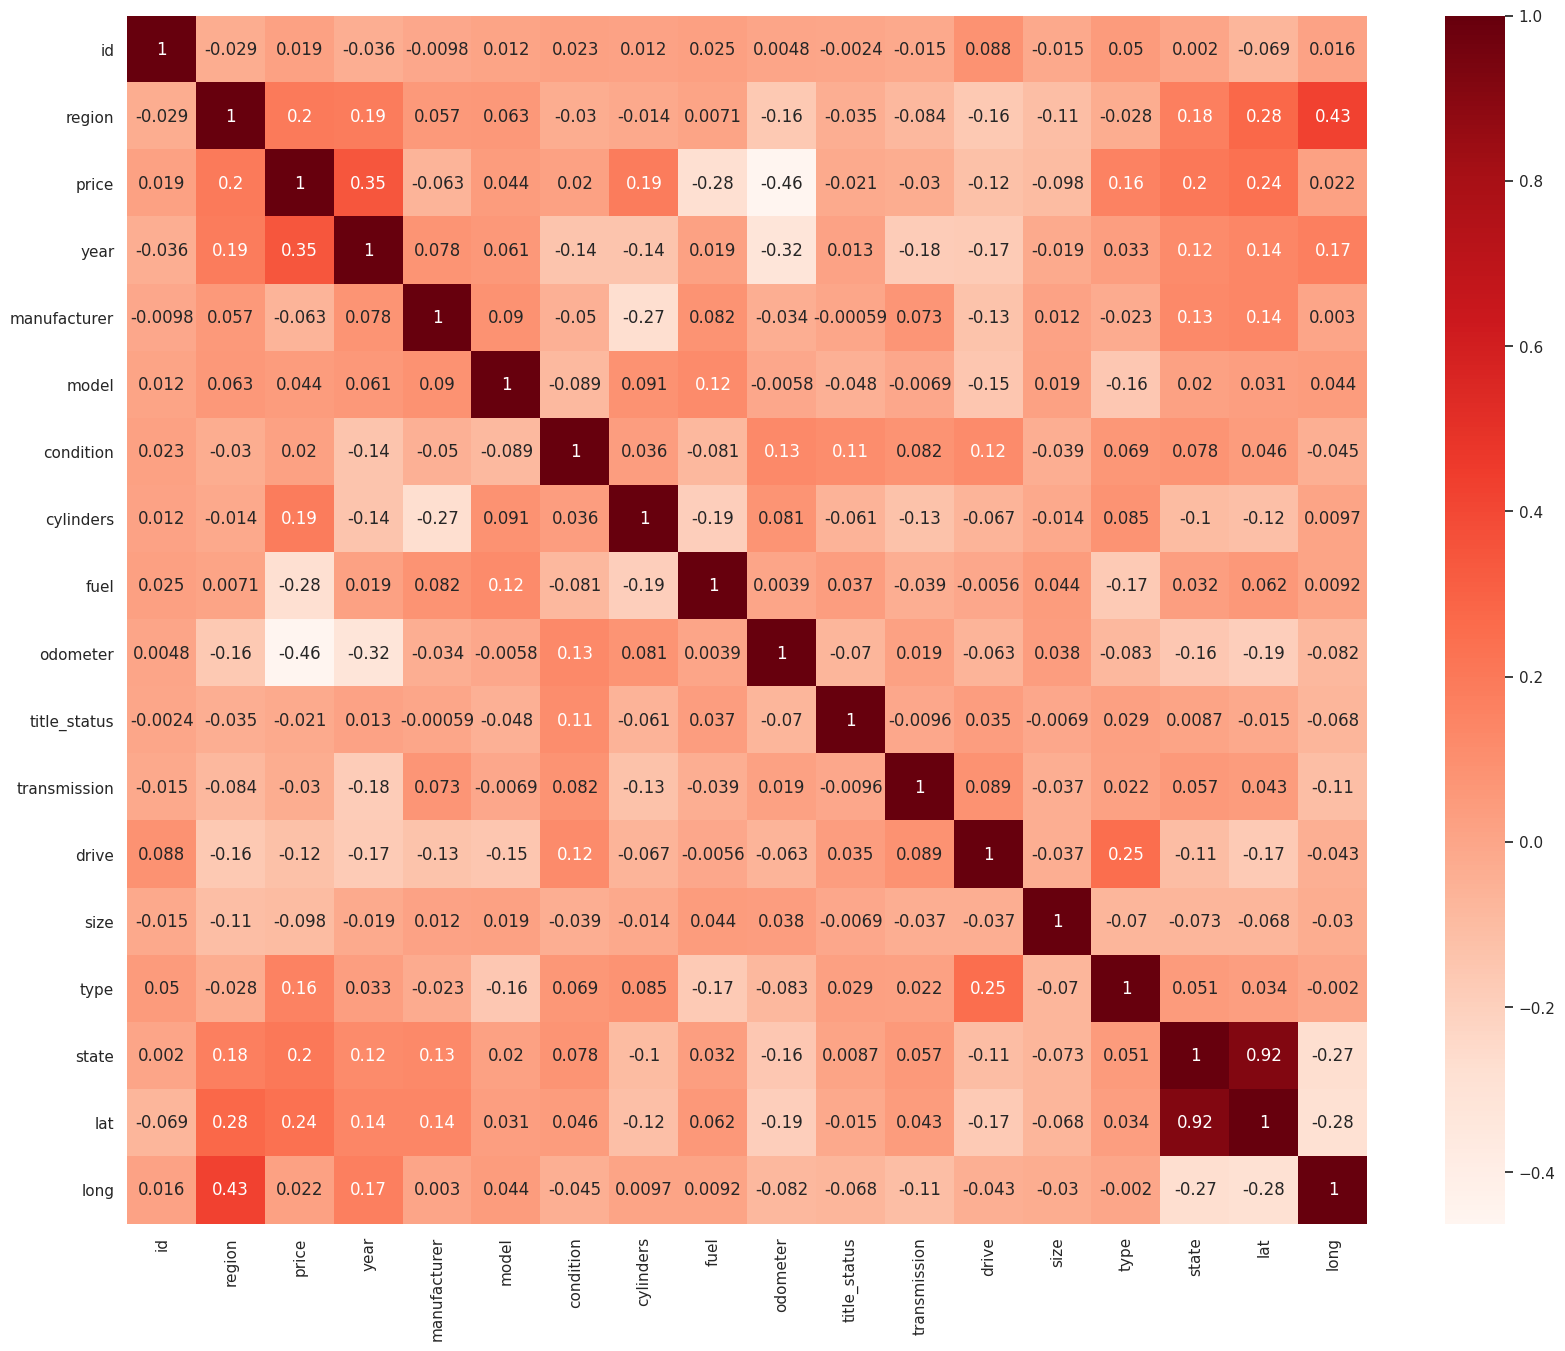

In [190]:
# corel = sel_data_c.corr()
# top_corr = corel.index
# plt.figure(figsize=(1000,1000))
# plt.show()
# g=sns.heatmap(sel_data_c[top_corr].corr(),annot=True,cmap="RdYlGn")

plt.figure(figsize=(20,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [191]:
#correlation dengan variabel targer
cor_target = abs(cor['condition'])

#checking highly correlated feature w/ condition
#memeriksa nilai korelasi tertinggi pada fitur-fitur berdasarkan target(condition)
rel_feat = cor_target[cor_target>0.1]
rel_feat

year            0.139979
condition       1.000000
odometer        0.127944
title_status    0.113083
drive           0.115289
Name: condition, dtype: float64

terdapat 4 fitur yang memiliki nilai korelasi yang cukup tinggi terhadap fitur target (condition), dilakukan pemeriksaan variabel independen.

In [192]:
print(df[['year','odometer','title_status','drive']].corr())

                  year  odometer  title_status     drive
year          1.000000 -0.322274      0.012871 -0.172332
odometer     -0.322274  1.000000     -0.069712 -0.063406
title_status  0.012871 -0.069712      1.000000  0.035379
drive        -0.172332 -0.063406      0.035379  1.000000


fitur odometer dihapus

In [0]:
df = df[['year','title_status','drive','condition']]
df #dataframe final yang akan diklasifikasi
df.to_csv('drive/My Drive/malin/dataset_class_2.csv')

**Independent & Dependent Variable**

Menentukan fitur yang menjadi variabel independen dan dependen

In [0]:
#independent
x = df.drop(['condition'], axis=1) 

#dependent
y = df['condition']

**Data Testing & Data Training**

Memisahkan dataset menjadi data test & train

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

# Classification

**Naive Bayes**

Klasifikasi menggunakan metode Naive Bayes

In [196]:
import warnings
warnings.filterwarnings('ignore')
#memanggil fungsi klasifikasi
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

#memasukan data training pada fungsi klasifikasi
nbtrain = model.fit(x_train, y_train)

#menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)

#akurasi
from sklearn import metrics 
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall

#evaluasi
print("Accuracy  : ", acc_score(y_test,y_pred))
print("F1-Score  : ", f1(y_test,y_pred, average='macro'))
print("Precision : ", prec(y_test,y_pred, average='macro'))
print("Recall    : ", recall(y_test,y_pred, average='macro'))

Accuracy  :  0.42451154529307283
F1-Score  :  0.2256773255496077
Precision :  0.2549905806645216
Recall    :  0.32234101474110755
